# Hierarchical Clustering

## Objetivo

*   Aprender a usar o algoritmo do Hierachical do Scikit-learn


In [2]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

np.random.seed(0)

## Gerar alguns dados 
### "Fazer uns Blobs"

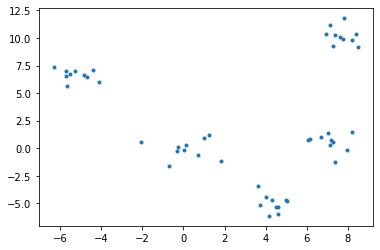

In [3]:
centroids = [[7,10], [0, 0], [5, -5], [-5, 7], [7,0]]

X, y = make_blobs(n_samples=50, centers=centroids, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], marker='.')

## Hierarchical Aglomerative

Nós Usaremos 3 parâmetros para o Hierarchical:

* n_clusters: 5 Número de CLusters
* linkage: como calcular a distância entre os pontos


In [8]:
import pylab
import scipy.cluster.hierarchy

HierarchicalAglo = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [9]:
HierarchicalAglo.fit(X,y)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [10]:
Hier_labels = HierarchicalAglo.labels_
df = pd.DataFrame(Hier_labels)
UniqueLabels = df[0].unique()

UniqueLabels

array([0, 1, 2, 3])

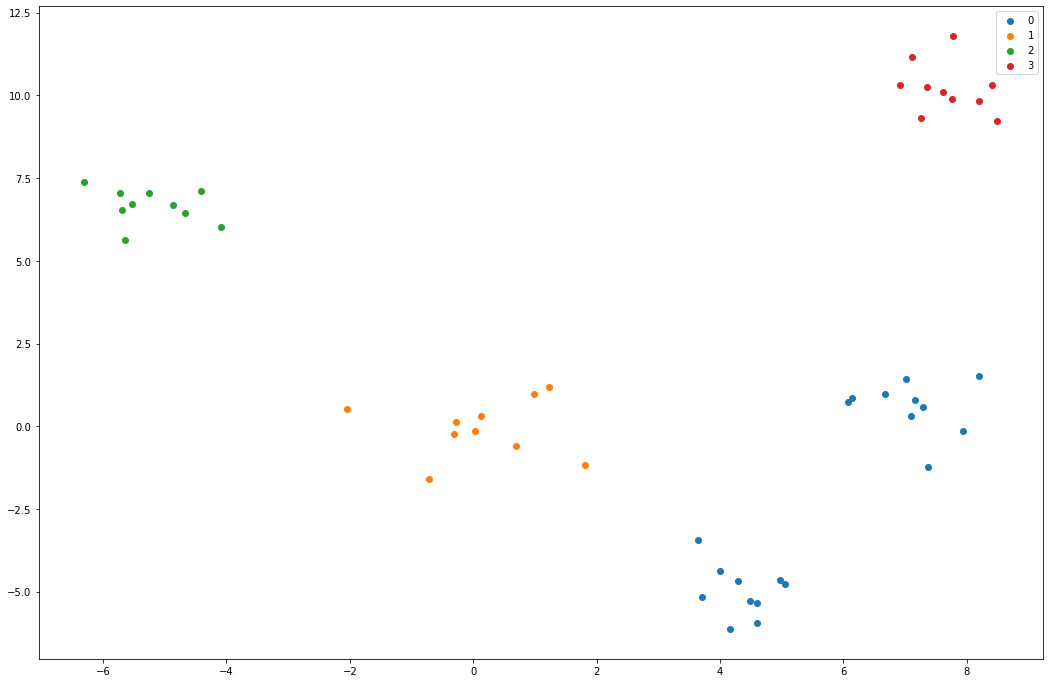

In [11]:
plt.figure(figsize=(18, 12))
for i in UniqueLabels:
    plt.scatter(X[Hier_labels == i , 0] , X[Hier_labels == i , 1] , label = i)
plt.legend()
plt.show()

## Dendograma

In [13]:
dist_matrix = distance_matrix(X,X) 
print(dist_matrix)

[[ 0.          5.95346004  0.66643913 ...  9.32651822 12.41123789
  13.39293208]
 [ 5.95346004  0.          5.78771818 ... 10.96982819  7.18604703
   8.20380845]
 [ 0.66643913  5.78771818  0.         ...  8.68941302 12.00619354
  12.97590381]
 ...
 [ 9.32651822 10.96982819  8.68941302 ...  0.         12.39015404
  12.92715284]
 [12.41123789  7.18604703 12.00619354 ... 12.39015404  0.
   1.01803223]
 [13.39293208  8.20380845 12.97590381 ... 12.92715284  1.01803223
   0.        ]]


/var/folders/fr/1byq_zn551q9hcfd9_hhlv5h0000gn/T/ipykernel_73157/2471224358.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


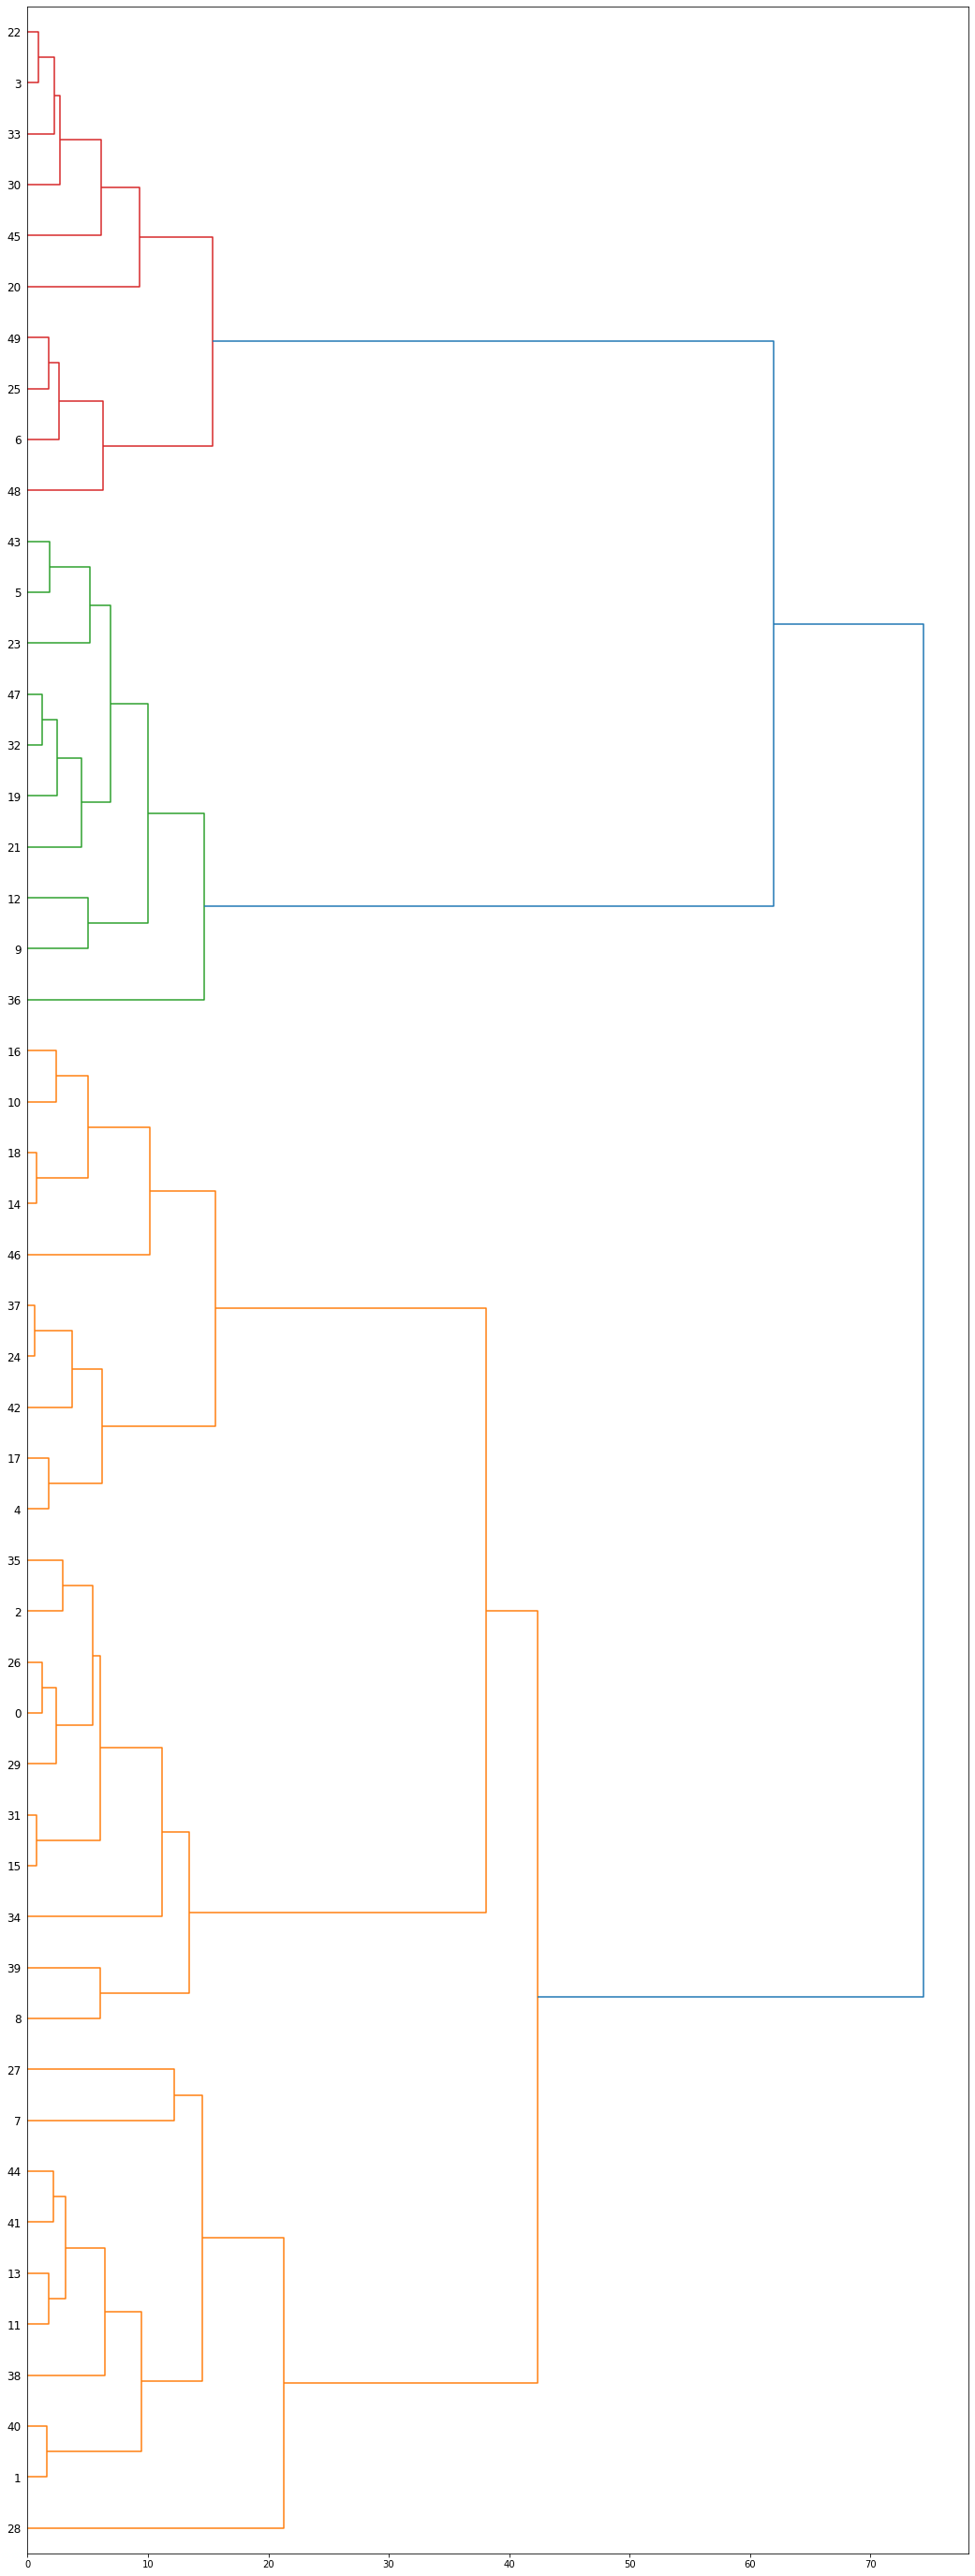

In [14]:
Z = hierarchy.linkage(dist_matrix, 'complete')
fig = pylab.figure(figsize=(18,50))
dendro = hierarchy.dendrogram(Z, leaf_font_size =12, orientation = 'right')